## Descrição do Projeto:


Estae trabalho visa realizar uma analise dos dados da empresa Zuber, uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. Iremos buscar padrões nas informações disponíveis e procurar entender as preferências dos passageiros e o impacto de fatores externos nas corridas.
Trabalhando com um banco de dados, iremos analisar dados de concorrentes e um teste de hipótese sobre o impacto do clima na frequência das viagens.

## Importando os dados

In [1]:
import pandas as pd 
import scipy.stats  as spt 
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px

In [2]:
trips_cnt= pd.read_csv('/datasets/project_sql_result_01.csv')


In [3]:
average_trips= pd.read_csv('/datasets/project_sql_result_04.csv')

## Analise dos datasets

O dataset traz informaçõe relacionadas:
   - número de corridas para cada empresa de taxi
   -empresas de taxi da região
   - média de corridas 
   -Bairros de destino

In [4]:
trips_cnt.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
trips_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
trips_cnt['trips_amount'] = trips_cnt['trips_amount'].astype(float)

- Afim de padronizar as tabelas, vamos trasformar trips_amount em float. 

In [7]:
trips_cnt.sort_values(by= 'trips_amount', ascending= False).head(15)

,company_name,trips_amount
0,Flash Cab,19558.0
1,Taxi Affiliation Services,11422.0
2,Medallion Leasing,10367.0
3,Yellow Cab,9888.0
4,Taxi Affiliation Service Yellow,9299.0
5,Chicago Carriage Cab Corp,9181.0
6,City Service,8448.0
7,Sun Taxi,7701.0
8,Star North Management LLC,7455.0
9,Blue Ribbon Taxi Association Inc.,5953.0


In [8]:
trips_cnt['company_name'].describe()

count                   64
unique                  64
top       Metro Jet Taxi A
freq                     1
Name: company_name, dtype: object

In [9]:
trips_cnt.duplicated().value_counts()

False    64
dtype: int64

In [10]:
trips_cnt.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


A destribuição de trips_amount não é homogênea, já que a média é bem superior a mediana, e o quartil superior (>75%) possui um valor bem acima dos demais, o que significa dizer que um número pequeno de empresas vão concentrar quantidade de corridas mais elevadas.  


### Analise de average_trips

In [11]:
average_trips.sort_values(by= 'average_trips', ascending= False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


   - Acima estão listados os 10+ destinos.

In [12]:
average_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [13]:
average_trips['dropoff_location_name'].describe()

count          94
unique         94
top       Ashburn
freq            1
Name: dropoff_location_name, dtype: object

In [14]:
average_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Analise de gráficos: 

#### Analise de gráficos: empresas de táxi X número de corridas 

(0.0, 30.0)

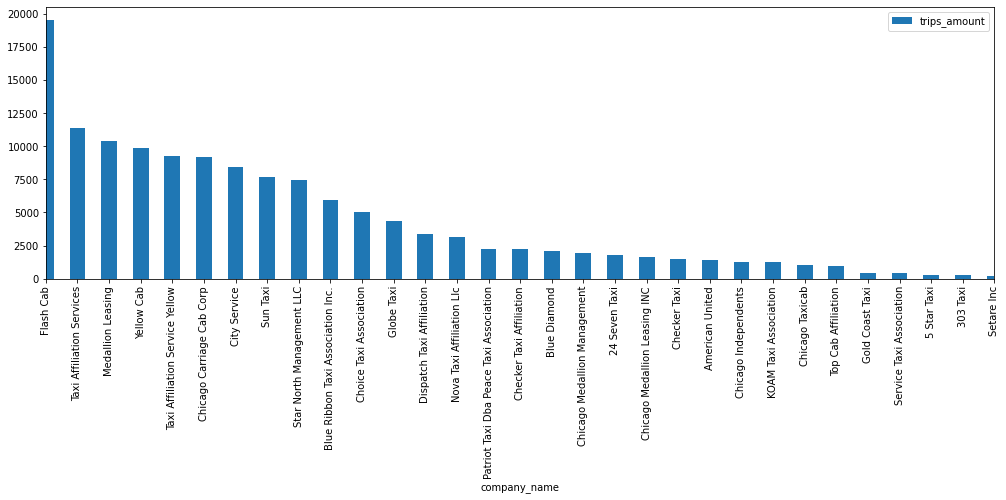

In [15]:
trips_cnt.plot(kind='bar', figsize=(17,5), x='company_name' )
plt.xlim( xmin= 0, xmax= 30 )



   * A empresa Flash Cab possui um valor bem mais elevado das demais empresas.
   *  Existe um grupo de 15 empresas com um número de corridas acima de 2500.
   

#### Analise de gráficos: Top 10 bairros por número de corridas 

(0.0, 35.0)

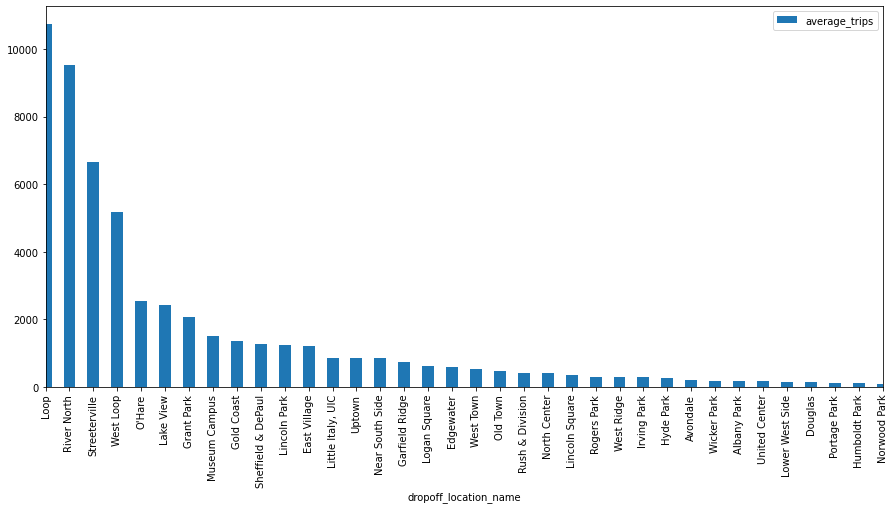

In [16]:
average_trips.plot(kind='bar', figsize=(15,7), x ='dropoff_location_name' )
plt.xlim( xmin= 0, xmax= 35 )


    Um grupo pequeno formado por 10 bairros concentra o maior número de corridas, os bairros com valores menos expressivos tem um número de corridas < 1200. 
    Portanto vamos usar esse valor como número de corte pra selecionar os bairros com mais destinos. 

In [17]:
trips_filter= average_trips.query('average_trips > 1250')


<AxesSubplot:xlabel='Bairros de destino', ylabel='Médias de Viagem'>

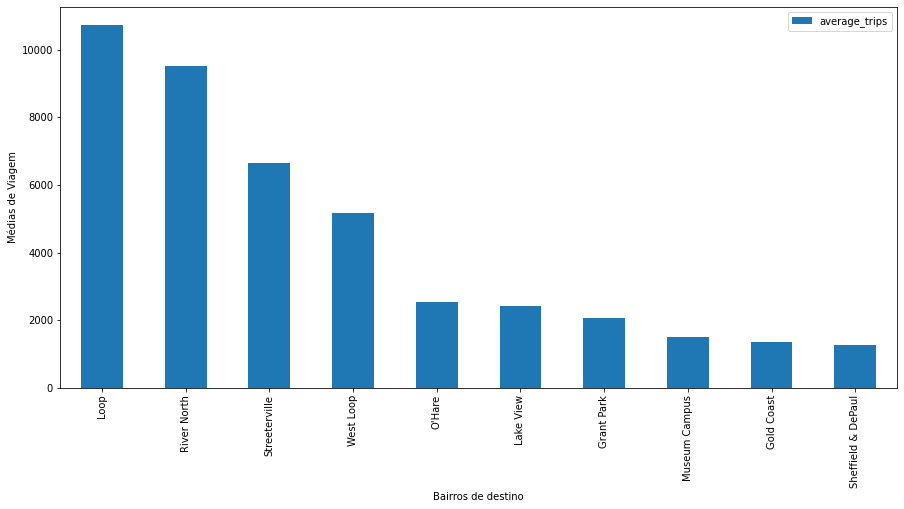

In [18]:
trips_filter.plot(kind='bar', figsize=(15,7), x ='dropoff_location_name', xlabel= 'Bairros de destino', ylabel = 'Médias de Viagem'   )


   * O 4 principais bairros possuem valores bem acima, > 5000, dos demais que se encontram na faixa <2000 .
     

## Teste de hipóteses


   Nesta etapa iremos realizar um teste de hipótese, para testar as seguintes condições:
  * A hipótese nula: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare são iguais nos sábados chuvosos." 
   * A hipótese alternativa: aonde a durção das corridas de fato mudam. 
        
   Para efetuar os testes,  vamos primeiramente filtra a tabela pela coluna weather_conditions que contém as informações sobre o clima, em 2 variáveis com o clima Good e Bad respectivamente, de acordo com o tempo de duração de cada corrida.    
   

In [19]:
trips_cnt= pd.read_csv('/datasets/project_sql_result_07.csv')
trips_cnt.head(3)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0


In [20]:
pd.to_datetime(trips_cnt['start_ts'])

0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1065   2017-11-11 13:00:00
1066   2017-11-11 08:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 1068, dtype: datetime64[ns]

In [21]:

weather_trip_B= trips_cnt.query("weather_conditions == 'Bad'")
weather_trip_G= trips_cnt.query("weather_conditions == 'Good'")

result_test= spt.ttest_ind(weather_trip_B['duration_seconds'] , weather_trip_G['duration_seconds']  , equal_var=False)

alpha= 0.05
print('p-value: ', result_test.pvalue)

if result_test.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  6.738994326108734e-12
We reject the null hypothesis


 ### Conclusões

     Os dados iniciais, após a devida etapa de pré-processamento e analise inicial, puderam fornecer analises interessantes, sobre como cada empresa de Taxi tem resultados diferentes de acordo com o comportamento dos usuários e a localização das corridas. Dentres as quais destacamos abaixo:
   -  A empresa Flash Cab possui um valor bem mais elevado das demais empresas.
   -  Existe um grupo de 15 empresas com um número de corridas acima de 2500.
   - O 4 principais destinos possuem valores bem acima (> 5000), dos demais que se encontram na faixa <2000 .

  Foi também realizado um teste de hipóteses,  aonde pudemos estimar que as médias da viagens ao aeroporto de fato mudam em dias de chuva.  